In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from google.cloud import vision
from pdf2image import convert_from_path
from PIL import Image, ImageDraw, ImageFont
%aimport io
from pathlib import Path
import fitz  # PyMuPDF
%aimport os
from xml.sax.saxutils import escape

In [32]:
from ocr_processing import build_processed_pdf, save_processed_pdf_data, load_processed_PDF_data, make_image_preprocess_mask

In [33]:
client = vision.ImageAnnotatorClient()

I0000 00:00:1732511254.159459 4480443 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


In [34]:
# def full_pdf_process(pdf_dir, pdf_filename, output_dir):
#     current_title, ext = os.path.splitext(pdf_filename)
#     assert ext == ".pdf", f"Expected .pdf, got {ext}"
#     text_pages, marked_images = build_processed_pdf(pdf_dir, pdf_filename)
#     save_annotated_text_and_image_data(output_dir, current_title, text_pages, marked_images)
#     save_xml_text_file(output_dir, current_title, text_pages)
#     return text_pages, marked_images

In [35]:
# directory to read pdfs from
pdf_dir =Path("../PDF/Phat_Giao_journals")

# directory to save output
output_dir = Path("../processed_journal_data")

In [36]:
pdf_to_process = pdf_dir / "TEST_phat-giao-viet-nam-1956-25-26.pdf"
basename = pdf_to_process.stem
pdf_to_process, basename

(PosixPath('../PDF/Phat_Giao_journals/TEST_phat-giao-viet-nam-1956-25-26.pdf'),
 'TEST_phat-giao-viet-nam-1956-25-26')

In [37]:
Path.exists(pdf_to_process)

True

In [38]:
pre_mask1 = make_image_preprocess_mask(0.1)

In [23]:
from pathlib import Path
from PIL import Image

# Define the path to the image
image_path = output_dir / basename / "images" / "annotated_page_2.png"

# Load the image using PIL
try:
    image = Image.open(image_path)
except FileNotFoundError:
    print(f"Image not found at: {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

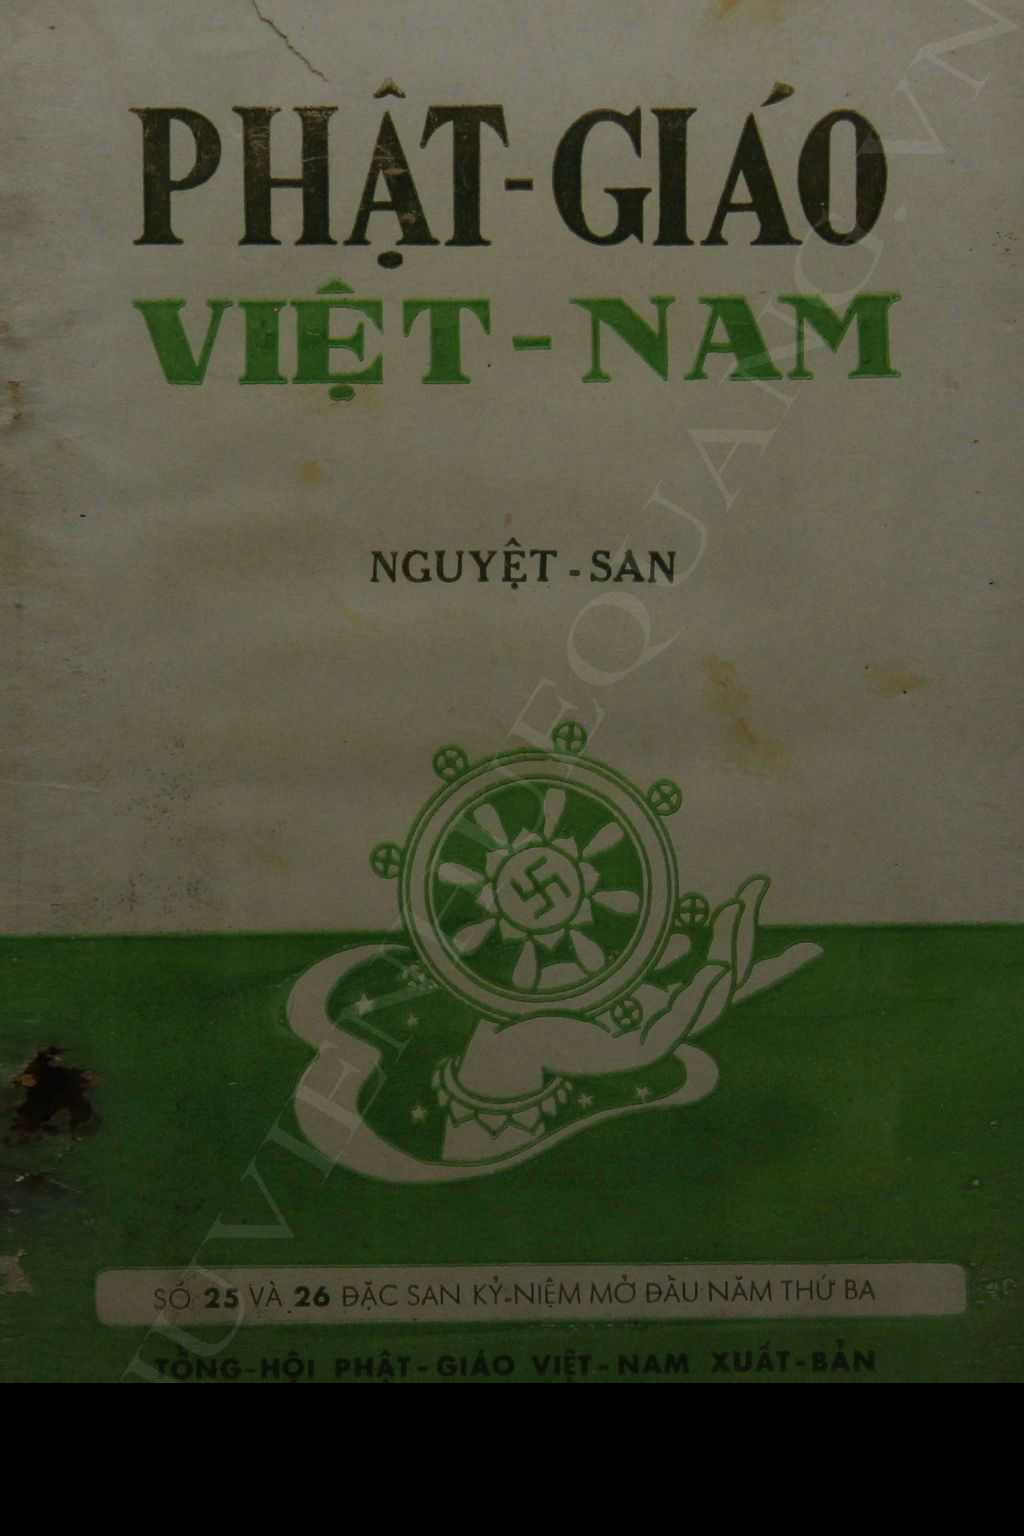

In [29]:
pre_mask1(unannotated_images[0], 1)

In [39]:
text_pages, word_locations_list, annotated_images, unannotated_images = build_processed_pdf(pdf_to_process, client, pre_mask1)

Processing document with 5 pages...
Processing page 1/5...
preprocessing...
Processing page 2/5...
preprocessing...
Processing page 3/5...
preprocessing...
Processing page 4/5...
preprocessing...
Processing page 5/5...
preprocessing...
page dimensions: {'width_in': 10.720472547743055, 'height_in': 16.08268059624566, 'width_px': 1024, 'height_px': 1536}


In [70]:
word_locations_list[0]

[description: "PHÁT"
 bounding_poly {
   vertices {
     x: 136
     y: 86
   }
   vertices {
     x: 527
     y: 82
   }
   vertices {
     x: 529
     y: 252
   }
   vertices {
     x: 138
     y: 256
   }
 },
 description: "GIÁO"
 bounding_poly {
   vertices {
     x: 551
     y: 82
   }
   vertices {
     x: 871
     y: 78
   }
   vertices {
     x: 873
     y: 247
   }
   vertices {
     x: 553
     y: 251
   }
 },
 description: "VIỆT"
 bounding_poly {
   vertices {
     x: 136
     y: 283
   }
   vertices {
     x: 475
     y: 279
   }
   vertices {
     x: 476
     y: 400
   }
   vertices {
     x: 137
     y: 404
   }
 },
 description: "-"
 bounding_poly {
   vertices {
     x: 497
     y: 279
   }
   vertices {
     x: 552
     y: 278
   }
   vertices {
     x: 553
     y: 398
   }
   vertices {
     x: 498
     y: 399
   }
 },
 description: "NAM"
 bounding_poly {
   vertices {
     x: 566
     y: 278
   }
   vertices {
     x: 891
     y: 274
   }
   vertices {
     x: 892
  

In [10]:
text_pages[4]

'vong của\nphép. Muốn đổi tên phải chờ Hội-nghị của Tổng hội họp lại và phải\nxin phép lại với chính-quyền. Vả lái, mục-đích của «Phật-giáo Việt\nNam Nguyệt - sau khi ra đời là nhằm nói lên cái tiếng nói của\nTổng hội, cái tinh thần, hoài bảo, chương – trình, triển\nTổng hội và nhất là báo - cáo, xúc – tiển sự thống - nhất thật sự của\nPhật giáo nước nhà. Vậy với những độc-giả mong muốn mở rộng,\ncải đổi nội dung, chúng tôi chỉ còn biết xin ghi lại ý-kiểu ấy để vận\nđộng xuất\nbản một tạp-chí khác.\nMột số độc giả bảo rằng bài vở quá cao, khó tiếp nhận được,\nchỉ bổ ích cho một tổ ít có trình độ học hỏi khá, còn phần đông đọc\nkhông thấy có lợi ích thiết thực. Nhưng một số độc-giả khác lại bảo\nrằng một tờ báo của Tổng hội cần phải nói lên được cái cao siêu\nthâm-thủy của Đạo, nếu không, thì có khác gì một tạp chí khác !\nThật là phức-tạp! Tuy thế, số người bảo rằng tờ Phật-giáo Việt-\nNam đọc khó hiểu chiếm phần đông. Vì thể chúng tôi sẽ cố gắng làm\nviền lòng quý vị độc - giả ấy bằng

In [ ]:
output_dir

PosixPath('../processed_journal_data')

In [11]:
save_processed_pdf_data(output_dir, basename, text_pages, word_locations_list, annotated_images, unannotated_images)

Processed data saved in: ../processed_journal_data/phat-giao-viet-nam-1956-01


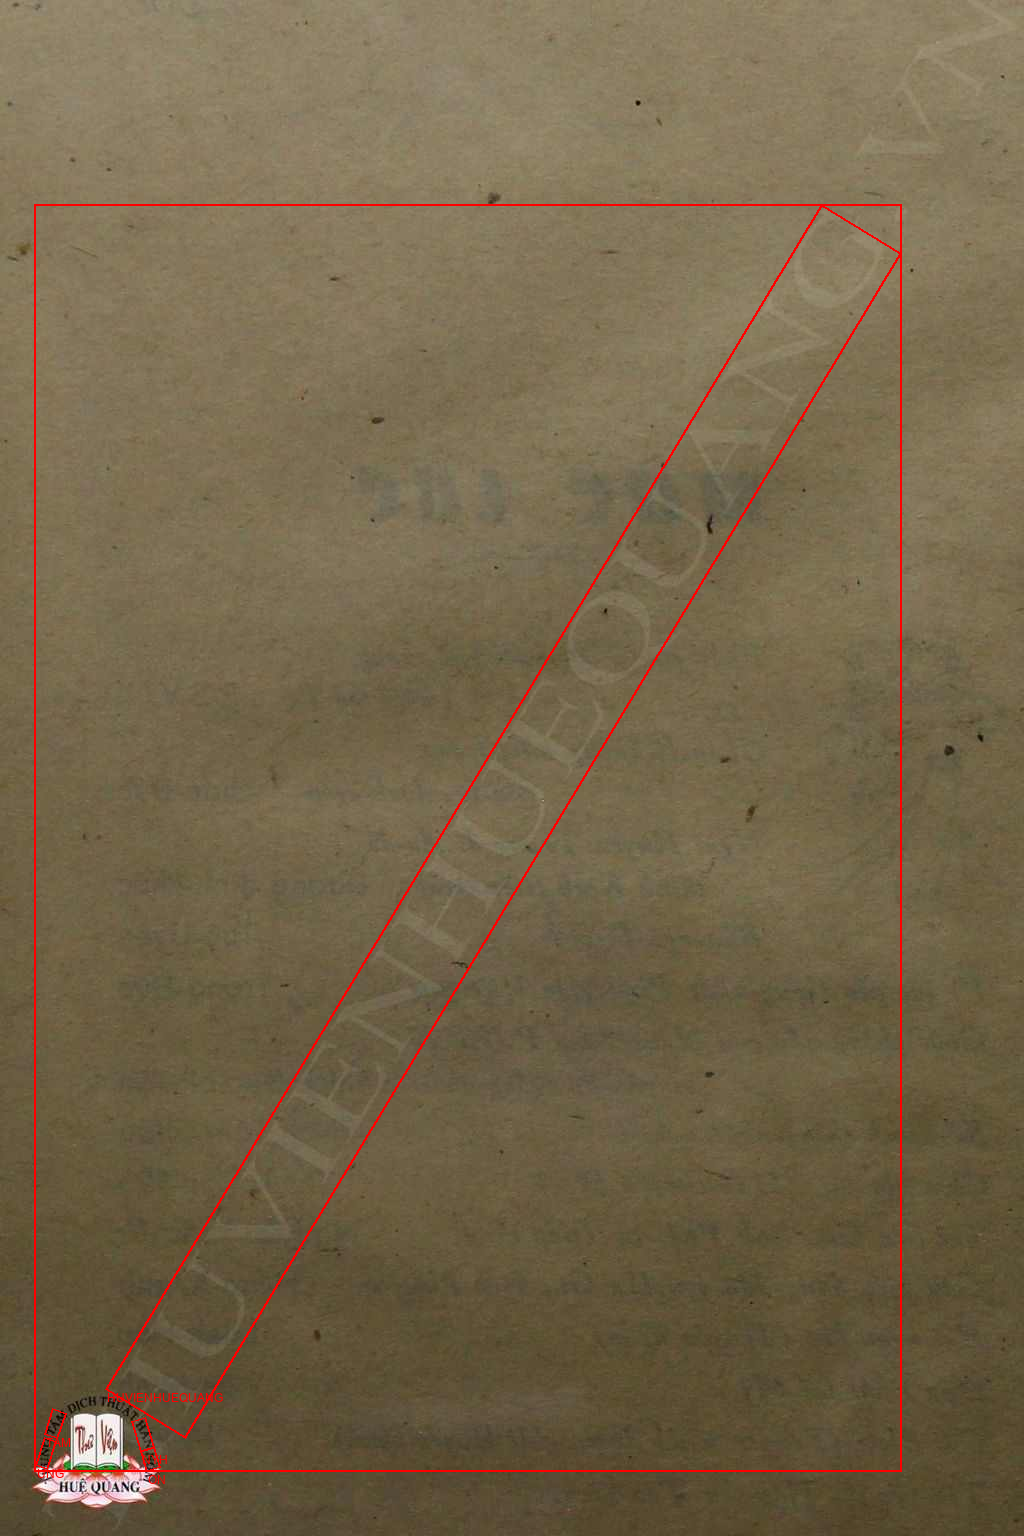

In [18]:
annotated_images[2]

In [19]:
word_locations_list[2]

[description: "UNG"
 bounding_poly {
   vertices {
     x: 35
     y: 1465
   }
   vertices {
     x: 44
     y: 1437
   }
   vertices {
     x: 56
     y: 1441
   }
   vertices {
     x: 47
     y: 1469
   }
 },
 description: "TAM"
 bounding_poly {
   vertices {
     x: 44
     y: 1434
   }
   vertices {
     x: 52
     y: 1408
   }
   vertices {
     x: 66
     y: 1413
   }
   vertices {
     x: 57
     y: 1438
   }
 },
 description: "ON"
 bounding_poly {
   vertices {
     x: 146
     y: 1471
   }
   vertices {
     x: 140
     y: 1451
   }
   vertices {
     x: 154
     y: 1447
   }
   vertices {
     x: 160
     y: 1467
   }
 },
 description: "NYH"
 bounding_poly {
   vertices {
     x: 140
     y: 1451
   }
   vertices {
     x: 131
     y: 1421
   }
   vertices {
     x: 145
     y: 1417
   }
   vertices {
     x: 154
     y: 1447
   }
 },
 description: "HUVIENHUEQUANG"
 bounding_poly {
   vertices {
     x: 105
     y: 1389
   }
   vertices {
     x: 821
     y: 204
   }
   ver

In [17]:
[words[-1] for words in word_locations_list]

[description: "QUANG"
 bounding_poly {
   vertices {
     x: 89
     y: 1478
   }
   vertices {
     x: 136
     y: 1478
   }
   vertices {
     x: 136
     y: 1494
   }
   vertices {
     x: 89
     y: 1494
   }
 },
 description: "QUANG"
 bounding_poly {
   vertices {
     x: 910
     y: 1479
   }
   vertices {
     x: 979
     y: 1479
   }
   vertices {
     x: 979
     y: 1495
   }
   vertices {
     x: 910
     y: 1495
   }
 },
 description: "HUVIENHUEQUANG"
 bounding_poly {
   vertices {
     x: 105
     y: 1389
   }
   vertices {
     x: 821
     y: 204
   }
   vertices {
     x: 901
     y: 253
   }
   vertices {
     x: 185
     y: 1438
   }
 },
 description: "QUANG"
 bounding_poly {
   vertices {
     x: 923
     y: 1479
   }
   vertices {
     x: 981
     y: 1479
   }
   vertices {
     x: 981
     y: 1494
   }
   vertices {
     x: 923
     y: 1494
   }
 },
 description: "NAM"
 bounding_poly {
   vertices {
     x: 862
     y: 1322
   }
   vertices {
     x: 916
     y: 1322

In [54]:
from PIL import Image, ImageDraw

def footer_line_test(image_path, y_coordinate, x_coordinate):
    """
    Draws a horizontal line at a specified y-coordinate and a vertical line at a specified x-coordinate on an image.

    Parameters:
    - image_path (str): Path to the input image file.
    - y_coordinate (int): The y-coordinate where the horizontal line will be drawn.
    - x_coordinate (int): The x-coordinate where the vertical line will be drawn.

    Returns:
    - Image: The modified image with the drawn lines.
    
    Example:
    >>> footer_line_test("input.jpg", 500, 250)
    """
    # Load the image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Get image dimensions
    width, height = image.size

    # Draw a horizontal line across the image
    draw.line([(0, y_coordinate), (width, y_coordinate)], fill="red", width=3)

    # Draw a vertical line across the image
    draw.line([(x_coordinate, 0), (x_coordinate, height)], fill="blue", width=3)

    return image

In [59]:
test_file = output_dir / "phat-giao-viet-nam-1956-09-10" / "images" / "page1.jpg"
test_file, test_file.exists()

(PosixPath('../processed_journal_data/phat-giao-viet-nam-1956-09-10/images/page1.jpg'),
 True)

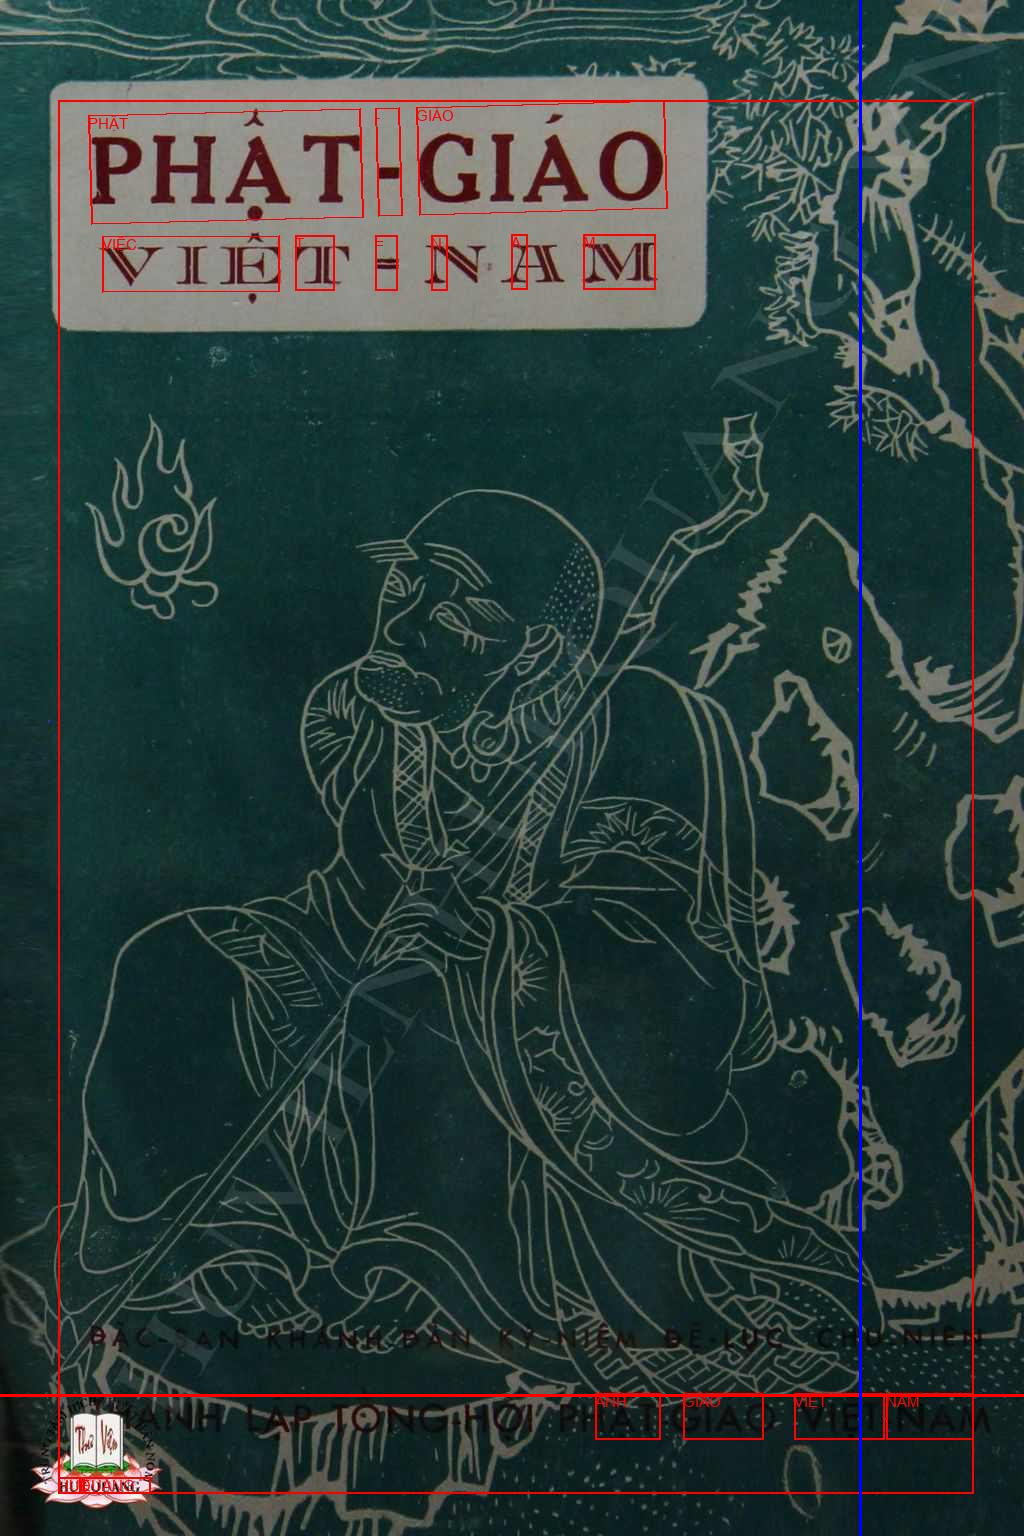

In [60]:
footer_line_test(test_file, 1395, 860)